## **Telco Customer Churn**

#### **Introduction to the Telco Customer Churn Dataset**

The Telco Customer Churn dataset is a publicly available dataset that captures detailed information about a telecommunications company's customer base. It is commonly used for exploring customer behavior patterns and building predictive models to determine whether a customer is likely to discontinue the service (i.e., churn).

The dataset includes 7,043 customer records, with each row representing a unique customer. It contains demographic information, account details, services subscribed, and a churn flag indicating whether the customer has left the company.

**Key Features:**

**Customer Demographics:** Gender, SeniorCitizen, Partner, Dependents

**Account Information:** Tenure, Contract Type, Payment Method, Paperless Billing

**Service Usage:** Phone service, Internet service, Streaming services, Tech support

**Charges:** Monthly charges and total charges

**Target Variable:** Churn (Yes/No)

**Objective:**

The primary goal of analyzing this dataset is to:

* Understand `why customers churn`,

* Identify `high-risk customer segments`, and

* Support the development of `proactive retention strategies`.

### **Data Collection & Loading**

##### **1. Importing the Required Libraries**

Before working with the dataset, we import essential Python libraries:

* `pandas` for data manipulation and analysis.

* `numpy` for numerical operations.

* `matplotlib.pyplot` and `seaborn` for data visualization.

* `warnings` to suppress unnecessary warning messages and keep the output clean.

These libraries form the foundation for performing Exploratory Data Analysis (EDA) and building predictive models.



In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### **2. Loading the Dataset**

* The Telco Customer Churn dataset can be dowloaded from `Kaggle`.

  (https://www.kaggle.com/code/farazrahman/telco-customer-churn-logisticregression/input)

* We load this dataset using `pd.read_csv()`. This function reads the CSV file and stores the data in a Pandas DataFrame called df.



In [2]:
# Loading the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

##### **3. Analyzing the Dataset**



###### **3.1 Viewing the First 5 Rows — df.head(5)**

The head() function is used to display the first five rows of the dataset. This allows us to:

* Get an initial look at the structure and format of the data.

* Understand the types of values stored in each column.

* Spot-check for inconsistencies, such as unexpected characters, missing values, or formatting issues.

This is a quick way to ensure the dataset loaded correctly.

In [3]:
# Viewing the First 5 Rows
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###### **3.2 Inspecting Data Structure — df.info()**

The info() function provides a concise summary of the DataFrame, including:

* Total number of entries (rows).

* Each column name and its data type (object, int64, float64, etc.).

* Number of non-null values per column.

* Overall memory usage of the dataset.

This step helps us:

* Detect missing values or null entries in the data

* Understand which columns are categorical vs. numerical

* Plan data cleaning and preprocessing steps accordingly

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From this information we can find that,

* The dataset has `7,043 entries` and `21 columns`.

* 8 columns are of type object (mostly categorical/text data).

* 2 columns are integers (SeniorCitizen, tenure), and 1 column is float (MonthlyCharges).

* TotalCharges is incorrectly typed as object — it needs to be converted to numeric for analysis.

* No missing values are reported.

### **Data preprocessing**

##### **1.Checking and Handling Null values**

We check for null or blank values and fix them to avoid errors in analysis.

In [5]:
## Checking for null values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


From the above information, we can see that there is no null values in any columns. So, we don't need to drop them.

##### **2.Checking and Handling duplicates**

Any repeated records are dropped to keep only unique customer entries.

In [6]:
## Checking for duplicates
df.duplicated().sum()

np.int64(0)

We can see that there is no duplicates so we don't need to drop them.

##### **3. Data type correction**

We correct data types if needed, converting TotalCharges from text to numeric.

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df['TotalCharges'].dtype

dtype('float64')

We can see that `TotalCharges` data type is converted to `float64`.

##### **4.Checking and Handling Outliers**

 We look for unusually high or low values in numeric columns that may affect results.

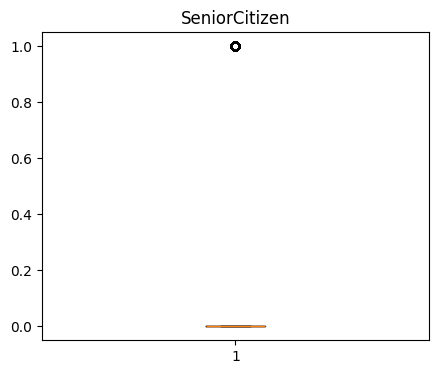

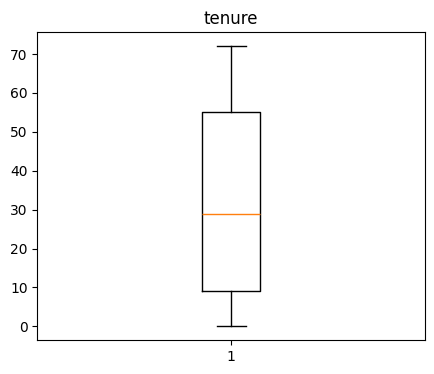

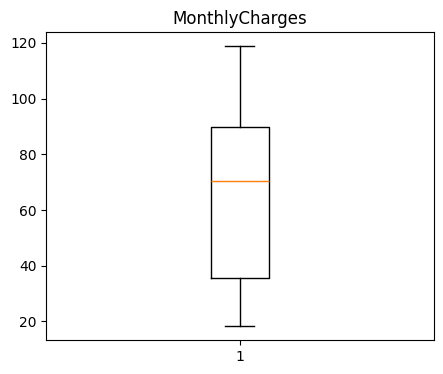

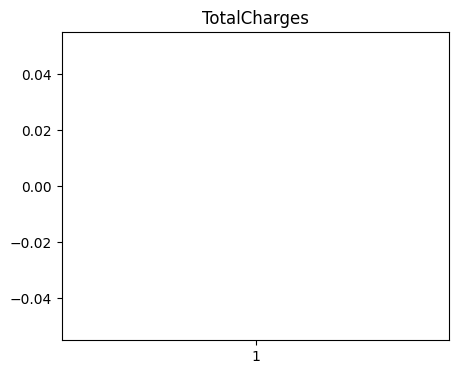

In [9]:
## Checking for outliers
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure(figsize=(5,4))
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

From the above box plots, it can be seen that there are no outliers in the numerical features.

### **Exploratory Data Analysis**

EDA is the `process of examining the dataset` to uncover patterns, spot anomalies, test hypotheses, and check assumptions. It helps us understand the structure, distribution, and relationships within the data.

In this project, our EDA will focus on:

* Understanding the distribution of numerical and categorical features.

* Comparing behaviors of churned vs. non-churned customers.

* Identifying trends related to tenure, contract type, and monthly charges.

* Spotting potential drivers of customer churn.

These insights are crucial to guide feature engineering and build effective predictive models.



####**1. What is the overall churn rate in the dataset?**

Let us first find `number of churned & non-churned/ retained customers` using `pandas` function.

In [10]:
customer_churned = df[df['Churn'] == 'Yes'].shape[0]
customer_not_churned =  df[df['Churn'] == 'No'].shape[0]
total_customers = df.shape[0]

print(f"Total number of customers:{total_customers}")
print(f"The number of customers churned: {customer_churned}, Percentage of customers churned: {(customer_churned/total_customers)*100:.2f}%")
print(f"The number of customers not churned: {customer_not_churned}, Percentage of customers not churned: {(customer_not_churned/total_customers)*100:.2f}%")

Total number of customers:7043
The number of customers churned: 1869, Percentage of customers churned: 26.54%
The number of customers not churned: 5174, Percentage of customers not churned: 73.46%


We can get that the percentage of churned customers is 26.5%.
So it is crucial to look into the data to find why customers are churning.

Let us visualise the same as bar chart using `matplotlib.pyplot` library.

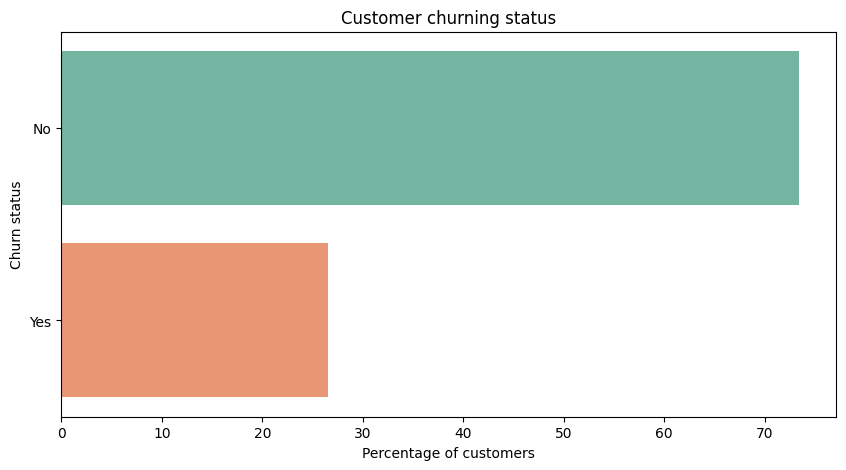

In [11]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['Churn'],palette='Set2',stat='percent')
plt.xlabel('Percentage of customers')
plt.ylabel('Churn status')
plt.title('Customer churning status')
plt.show()

Here we can see that, the orange colour bar represents the cutomers who are churned implying 27% approx. & green colour bar represents the customers who are retained implying 73% approx.

####**2. What are the demographic characteristics of churned vs. retained customers?**

Let us see whether the demographic characteristics such as `Gender`,`Senior Citizen` & `Partners` have any impact on the churned customers.



**1. Gender**

The number of churned & retained customers according to gender can be found using `group by` function.

The grouping created must be converted into dataframe  to use it for plotting.

In [12]:
genderwise_churn = df.groupby(['Churn','gender'])['customerID'].count().sort_values(ascending=True)
genderwise_churn = pd.DataFrame(genderwise_churn)
genderwise_churn

customerID
Churn gender            
Yes   Male           930
      Female         939
No    Female        2549
      Male          2625

Let us create a plot for analysing the churned vs retained customers according to gender using `matplotlib.pyplot` using the `genderwise_churn` grouping created before.

Text(0.5, 1.0, 'Churned vs retained customers according to gender')

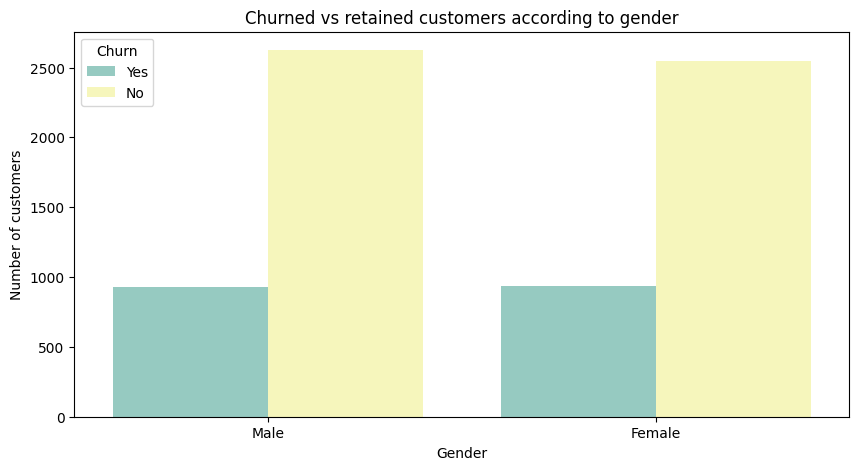

In [13]:
# Plot for analysing the churned vs retained customers according to gender
plt.figure(figsize=(10,5))
sns.barplot(data=genderwise_churn,x='gender',y='customerID',hue='Churn',palette='Set3')
plt.xlabel('Gender')
plt.ylabel('Number of customers')
plt.title('Churned vs retained customers according to gender')

From the above bar chart, it is seen that the number of customers churning are almost equal in both male & female gender.

So it is understood that gender is not influencing the churn to a great extent.

**2. Senior Citizen**

* The number of churned & retained customers according to Senior Citizenship can be found using `group by` function.

* The grouping created must be converted into dataframe  to use it for plotting.

* To see tha grouped data more clearly, we need to reset the index using `reset_index()` and then replacing the values `1` & `0` to `Yes` & `No` respectively.

In [14]:
Senior_churn = df.groupby(['Churn','SeniorCitizen'])['customerID'].count().sort_values(ascending=True)
Senior_churn = pd.DataFrame(Senior_churn)
Senior_churn = Senior_churn.reset_index()
Senior_churn['SeniorCitizen']=Senior_churn['SeniorCitizen'].replace({1: "Yes", 0: "No"})
Senior_churn

,Churn,SeniorCitizen,customerID
0,Yes,Yes,476
1,No,Yes,666
2,Yes,No,1393
3,No,No,4508


Let us create a plot for analysing the churned vs retained customers according to gender using `matplotlib.pyplot` using the `Senior_churn` grouping created before.

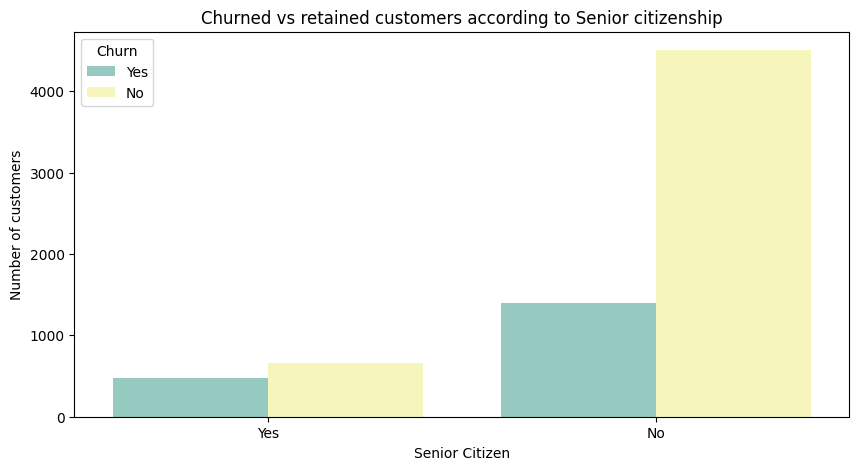

In [15]:
# Plot for analysing the churned vs retained customers according to Senior citizenship
plt.figure(figsize=(10,5))
sns.barplot(data=Senior_churn,x='SeniorCitizen',y='customerID',hue='Churn',palette='Set3')
plt.xlabel('Senior Citizen')
plt.ylabel('Number of customers')
plt.title('Churned vs retained customers according to Senior citizenship')
plt.show()

From the above bar chart,
* It is seen that the number of Senior citizen customers churning are slightly less than the senior citizen retained customers.
* The number of Non-Senior citizen customers churning are  less than the half of the senior citizen retained customers.

So there is `no evident correlation` between being a `senior citizen and churn`, as the churn is evenly distributed across both categories.

**3. Partners**

* The number of churned & retained customers according to `Partnership` can be found using `group by` function.

* The grouping created must be converted into dataframe to use it for plotting.


In [16]:
df['Partner'].value_counts()

,count
Partner,
No,3641
Yes,3402


In [17]:
Partner_churn = df.groupby(['Churn','Partner'])['customerID'].count().sort_values(ascending=True)
Partner_churn = pd.DataFrame(Partner_churn)
Partner_churn

customerID
Churn Partner            
Yes   Yes             669
      No             1200
No    No             2441
      Yes            2733

Let us create a plot for analysing the churned vs retained customers according to `partnership` using `matplotlib.pyplot` using the `Partner_churn` grouping created before.

Text(0.5, 1.0, 'Churned vs retained customers according to Partnership')

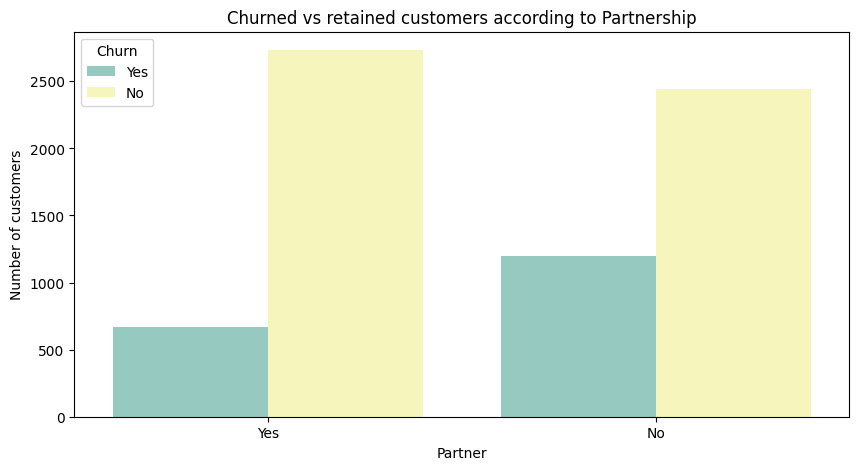

In [18]:
# Plot for analysing the churned vs retained customers according to Partnership
plt.figure(figsize=(10,5))
sns.barplot(data=Partner_churn,x='Partner',y='customerID',hue='Churn',palette='Set3')
plt.xlabel('Partner')
plt.ylabel('Number of customers')
plt.title('Churned vs retained customers according to Partnership')

* From the above plot, it can be seen that the number of `churned customers are higher` when they have `no partner` & it is less when they have partner.
* This suggests that customers without a partner are more likely to churn.
* However, the non-churned customers with no partner, which is almost double churned customers with a partner.This means having `no partner doesn’t necessarily lead to churn`, but it may be a contributing factor when combined with other features.

####**3. How does tenure (length of time as a customer) affect churn?**


Let us see whether tenure period affect the churning in customers.

The descriptive statistics of tenure is calculated using `describe()` function in pandas library.

In [19]:
df['tenure'].describe()

,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


* The tenure column represents how long customers have stayed with the company (in months).
* It ranges from `1 to 72 months`, with an `average of ~32 months`. This indicates a mix of both new and long-term customers, with a significant portion having `shorter tenures`.

* The number of churned & retained customers according to `tenure period` can be found using group by function.

* The grouping created must be converted into dataframe to use it for plotting.

In [20]:
tenure_churn = df.groupby(['Churn','tenure'])['customerID'].count().sort_values(ascending=True)
tenure_churn = pd.DataFrame(tenure_churn).reset_index()
tenure_churn

,Churn,tenure,customerID
0,Yes,64,4
1,Yes,63,4
2,Yes,62,5
3,Yes,44,6
4,Yes,60,6
...,...,...,...
140,Yes,2,123
141,No,71,164
142,No,1,233
143,No,72,356


##### **Statistical testing**

Let us do hypothesis testing to dive deep into the dataset's `tenure` behavior.

**Problem:**

How does tenure (length of time as a customer) affect churn?

**Solution:**

* To analyze how tenure (length of time as a customer) affects churn using statistical analysis, we can perform a Chi-Square Test of Independence.
* To check whether customer churn is independent of tenure duration or whether there is a statistical association between tenure and churn.


**Statistical method for analysis:** Chi-Square Test of Independence

**Null Hypothesis:**

* customer churn is independent of tenure duration

**Alternative hypothesis:**

* there is a statistical association between tenure and churn

**Columns:**
* Churn: Categorical (Yes / No)

* Tenure: Numerical (0 to 70 months)

**1. Bin the Tenure Data**

As Tenure is continuous (0–70), grouping it into categories (bins) is needed so that we can apply the Chi-Square test.

`0–12 months  → New`

`13–24 months → Early`

`25–48 months → Established`

`49–70 months → Loyal`

**2. Create a Contingency Table**

Create a cross-tabulation of Churn vs Tenure_Bin using `pd.crosstab`

**3. Perform Chi-Square Test of Independence**

This will test if Churn and Tenure_Bin are independent.

**4. Interpret Results**

* If `p-value < 0.05`, we `reject the null hypothesis` → There is a relationship between tenure and churn.

* If `p-value ≥ 0.05`, we `fail to reject the null` → Tenure and churn are independent.

In [21]:
# 1. Bin the tenure data
def categorizing_tenure(tenure):
    if tenure <= 12:
        return 'New'
    elif tenure <= 24:
        return 'Early'
    elif tenure <= 48:
        return 'Established'
    else:
        return 'Loyal'

df['tenure_Bin'] = df['tenure'].apply(categorizing_tenure)
df['tenure_Bin'].value_counts()

,count
tenure_Bin,
Loyal,2239
New,2186
Established,1594
Early,1024


In [22]:
# 2. Create a Contingency Table
contingency_table = pd.crosstab(df['tenure_Bin'], df['Churn'])
contingency_table

Churn,No,Yes
tenure_Bin,,
Early,730,294
Established,1269,325
Loyal,2026,213
New,1149,1037


In [23]:
# 3. Perform Chi-square test of independence
import scipy.stats as stats

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}")
print(f"p-value: {p_val}")

Chi-square Statistic: 856.1002388751685
p-value: 2.9437703649803846e-185


In [24]:
# 4. Interpret the results
if p_val <0.05:
  print("We reject the null hypothesis, There is a relationship between tenure and churn")
else:
  print("We fail to reject the null, Tenure and churn are independent.")

We reject the null hypothesis, There is a relationship between tenure and churn


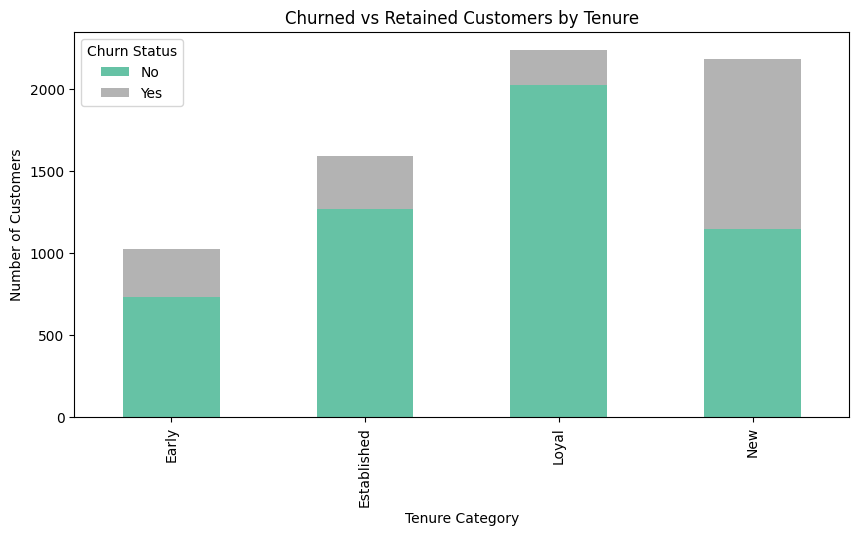

In [25]:
# 5. Visualizing the results
tenure_churn_category = pd.DataFrame(contingency_table).reset_index()

# Plot for analysing the churned vs retained customers according to Tenure period category bins
tenure_churn_category.set_index('tenure_Bin').plot(kind='bar', stacked=True, figsize=(10,5), colormap='Set2')
plt.xlabel('Tenure Category')
plt.ylabel('Number of Customers')
plt.title('Churned vs Retained Customers by Tenure')
plt.legend(title='Churn Status')
plt.show()

We can see that the customers churning are almost equal to the retained customers in `new stage` of tenure period (0–12 months → New), which means half of the new customers are churning.

##### **Visualizing the churned customers according to tenure period**

Let us create a scatter plot for analysing the churned vs retained customers according to `tenure` period using matplotlib.pyplot using the `tenure_churn` grouping created before.

Text(0.5, 1.0, 'Churned vs retained customers according to Tenure period')

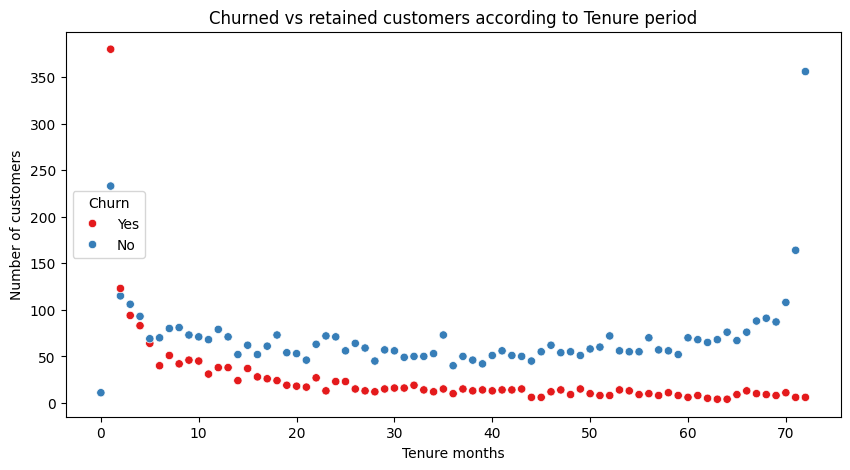

In [26]:
# Plot for analysing the churned vs retained customers according to Tenure period
plt.figure(figsize=(10,5))
sns.scatterplot(data=tenure_churn,x='tenure',y='customerID',hue='Churn',palette='Set1')
plt.xlabel('Tenure months')
plt.ylabel('Number of customers')
plt.title('Churned vs retained customers according to Tenure period')

* From the above scatter plot, we can see that blue dots representing non-churned customers stay long as the tenure period for the large number of non-churned customers is 70 months.

* And which in turn, we can see that red dots representing churned customers leave early as the tenure period for the large number of churned customers is 1-2 months.

Let us analyse this only for chunred customers by `filtering` only the churned customers and then by `grouping` according to `tenure period`.

In [27]:
churned_cust_tenure = tenure_churn[tenure_churn['Churn']=='Yes'].sort_values(by='customerID',ascending=False)
churned_cust_tenure

,Churn,tenure,customerID
144,Yes,1,380
140,Yes,2,123
136,Yes,3,94
131,Yes,4,83
107,Yes,5,64
...,...,...,...
7,Yes,71,6
3,Yes,44,6
2,Yes,62,5
1,Yes,63,4


From this, we can see that the majority of churned customers leave in `first 5 months` only.

Let us visualize this using `scatter plot`.

Text(0.5, 1.0, 'Churned customers according to Tenure period')

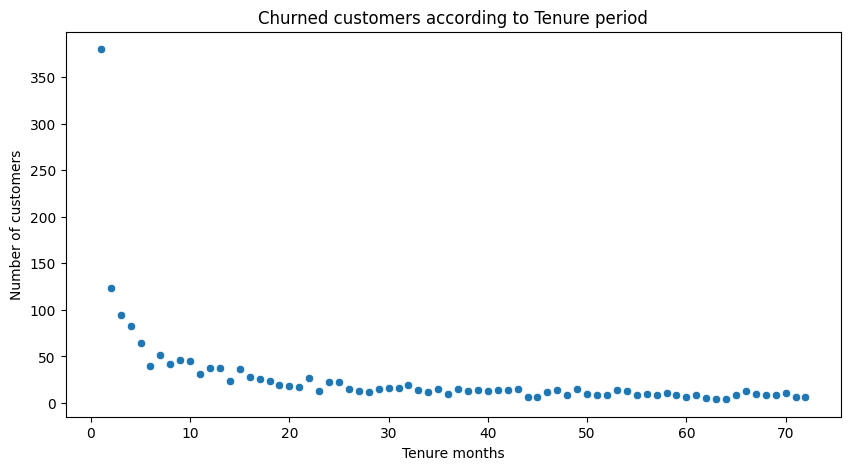

In [28]:
# Plot for analysing the churned vs retained customers according to Tenure period
plt.figure(figsize=(10,5))
sns.scatterplot(data=churned_cust_tenure ,x='tenure',y='customerID')
plt.xlabel('Tenure months')
plt.ylabel('Number of customers')
plt.title('Churned customers according to Tenure period')

* From the graph, we can see that large numbers of customers are churned in early tenure period only,i.e. In first 5 to 10 months, after that the number of customers churning are reduced & staying constant almost.

* Since `many customers churn within the early tenure` period, focusing on improving `onboarding`, `support`, and `engagement during the first few months` can significantly enhance retention and `reduce churn` risk.

#### **4. What services are more commonly used by churned customers?**

Let us see what are the services more commonly used by churned customers.

To get the services, first we need to see the names of the columns/features using `df.columns` function.

In [29]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_Bin'],
      dtype='object')

From this, we can get that the services offered are
* PhoneServices
* InternetService

Let us begin our analysis on all these services to find the churning behavior.

For this, firstly we are `filtering` the dataset to get the details of churned customers only.

In [30]:
churned_customers = df[df['Churn']=='Yes']
churned_customers.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_Bin
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,New
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Established
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Loyal


The number of churned customers who choose PhoneService can be found by using `value_counts()` function.

In [31]:
churned_customers['PhoneService'].value_counts()

,count
PhoneService,
Yes,1699
No,170


We can see that the churned customers who choose PhoneService are 1699 nos & who are not are 170 nos.

The number of churned customers who choose InternetService can be found by using value_counts() function.

In [32]:
churned_customers['InternetService'].value_counts()

,count
InternetService,
Fiber optic,1297
DSL,459
No,113


We can see that the churned customers who choose Fiber optic InternetService are 1297 nos,DSL InternetService are 459 nos & who are not are 113 nos.



To see the relation between PhoneSerive & InternetService of the churned customers, we can use `group by` function & then converting it into DataFrame so that it can used for plotting.

In [33]:
services_churn = churned_customers.groupby(['PhoneService','InternetService'])['customerID'].count()
c = pd.DataFrame(services_churn).reset_index()
services_churn

PhoneService  InternetService
No            DSL                 170
Yes           DSL                 289
              Fiber optic        1297
              No                  113
Name: customerID, dtype: int64

From this we can see that,

* Highest churn (1297) is from users with Phone + Fiber optic, suggesting dissatisfaction or high cost.

* Lower churn (459) among DSL users.

* 113 churned despite no InternetService, possibly due to other service issues.

Let us visualize this using bar plot.

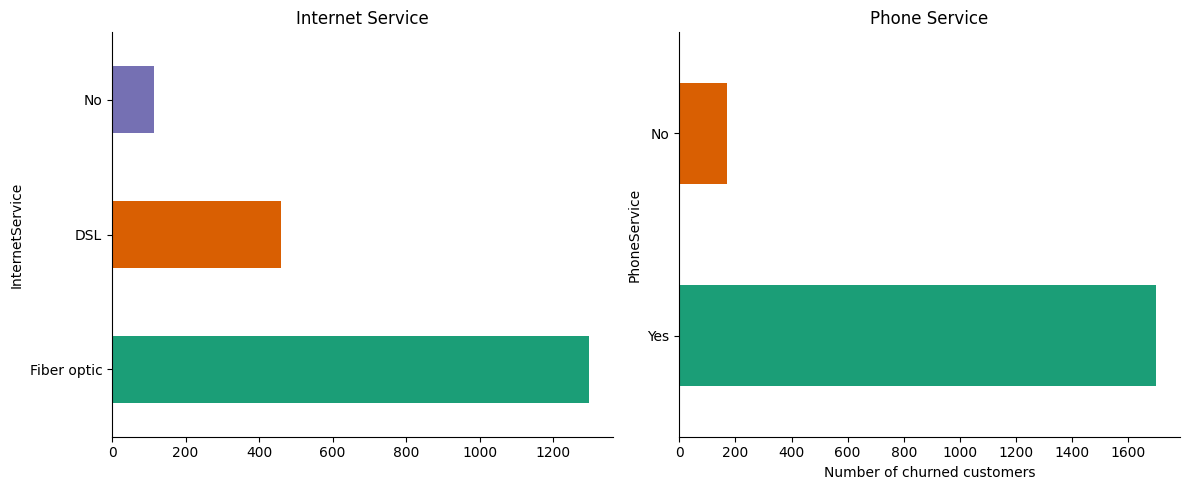

In [34]:
# Create a figure with 2 plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot InternetService bar chart
churned_customers['InternetService'].value_counts().plot(kind='barh', color=sns.color_palette('Dark2'), ax=ax1)
ax1.set_title('Internet Service')
ax1.spines[['top', 'right']].set_visible(False)


# Plot PhoneService bar chart
churned_customers['PhoneService'].value_counts().plot(kind='barh', color=sns.color_palette('Dark2'), ax=ax2)
ax2.set_title('Phone Service')
ax2.spines[['top', 'right']].set_visible(False)

plt.xlabel('Number of churned customers')
plt.tight_layout()
plt.show()

We can see that the `churned customers` most popularly use `Fiber optic` Internet Service & use `Phone service` than churned using DSL Internet Service, not using Internet service & not using Phone service.

#### **5. Is there a significant difference in monthly charges or total charges between churned and retained customers?**

Let us see whether monthly charges or total charges affect the churning in customers.

The descriptive statistics of `MonthlyCharges` is calculated using `describe()` function in pandas library.

In [35]:
df['MonthlyCharges'].describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


From the descriptive statistics we can get that,

* `Average` monthly charge is around `$64.76`.

* `50% of customers` pay `less than $70.35`.

* Charges `range` from `$18.25 to $118.75`, showing a wide variation in service plans.

* `25% of customers` pay `less than $35.50`, likely on basic plans.

* `Top 25%` pay `more than $89.85`, possibly for bundled/premium services.

The descriptive statistics of `TotalCharges` is calculated using `describe()` function in pandas library.

In [36]:
df['TotalCharges'].describe()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


From the descriptive statistics we can get that,

* `Average` total charge is `$2,283.30`, with high variability (std ≈ $2,266.77).

* `50%` of customers have paid `less than $1,397.48`, suggesting many are relatively new.

* `25%` have paid `less than $401.45`, indicating early-stage customers.

* `Top 25%` have paid over `$3,794.74`, showing a loyal or long-term customer base.

* The `maximum` is `$8,684.80`, pointing to long-tenured or high-usage customers.

##### **Statistical testing**

Let us do hypothesis testing to dive deep into the dataset's `tenure` behavior.

**Problem:**

Is there a significant difference in monthly charges or total charges between churned and retained customers?

**Solution:**

* To analyze whethere a significant difference in monthly charges or total charges between churned and retained customers using statistical analysis, we can perform a Two sample independent t-test.


**Statistical method for analysis:** Two sample t-test

**Null Hypothesis:**

* There is no significant difference in monthly charges or total charges between churned and retained customers.

**Alternative hypothesis:**

* There is a significant difference in monthly charges or total charges between churned and retained customers.

**Columns:**
* Churn: Categorical (Yes / No)

* MonthlyCharges: float (18.25 to 118.75)

* TotalCharges: float (18.8 to 8684 )

**Methodology:**

**1. Drop missing or invalid entries**

As the total charges may contains missing or invalid entries, we need to drop them, so that we can perform t-test.

**2. Grouping the data**

As we need to perform t-test for churned vs retained customers, we need to split the data into churned & retained groups.

**3. Perform t-test for Monthly charges**

This will test if Churn and Monthly charges are independent.

**4. Perform t-test for Total charges**

This will test if Churn and Total charges are independent.

**4. Interpret Results**

If p-value < 0.05, we reject the null hypothesis → There is a significant difference in monthly or total charges between churned and retained customers

If p-value ≥ 0.05, we fail to reject the null → There is no significant difference in monthly or total charges between churned and retained customers

In [37]:
# 1. Drop missing or invalid entries
df = df[df['TotalCharges'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [38]:
# 2. Separate data into churned and retained groups
churned = df[df['Churn'] == 'Yes']
retained = df[df['Churn'] == 'No']

In [39]:
# 3. Perform t-test for MonthlyCharges
from scipy.stats import ttest_ind

t_stat_mc, p_val_mc = ttest_ind(churned['MonthlyCharges'], retained['MonthlyCharges'], equal_var=False)

print("Monthly Charges t-test:")
print(f"t-statistic = {t_stat_mc:.4f}, p-value = {p_val_mc:.4f}")

Monthly Charges t-test:
t-statistic = 18.3409, p-value = 0.0000


In [40]:
# 4. Perform t-test for TotalCharges
from scipy.stats import ttest_ind

t_stat_tc, p_val_tc = ttest_ind(churned['TotalCharges'], retained['TotalCharges'], equal_var=False)

print("\nTotal Charges t-test:")
print(f"t-statistic = {t_stat_tc:.4f}, p-value = {p_val_tc:.4f}")


Total Charges t-test:
t-statistic = -18.8008, p-value = 0.0000


In [41]:
# 5. Interpret the results
if p_val_mc <0.05:
  print("Monhtly charges: We reject the null hypothesis, There is a significant difference in monthly charges between churned and retained customers")
else:
  print("Monhtly charges: We fail to reject the null, There is no significant difference in monthly charges.")

if p_val_tc <0.05:
  print("Total charges: We reject the null hypothesis, There is a significant difference in total charges between churned and retained customers")
else:
  print("Total charges: We fail to reject the null, There is no significant difference in total charges.")

Monhtly charges: We reject the null hypothesis, There is a significant difference in monthly charges between churned and retained customers
Total charges: We reject the null hypothesis, There is a significant difference in total charges between churned and retained customers


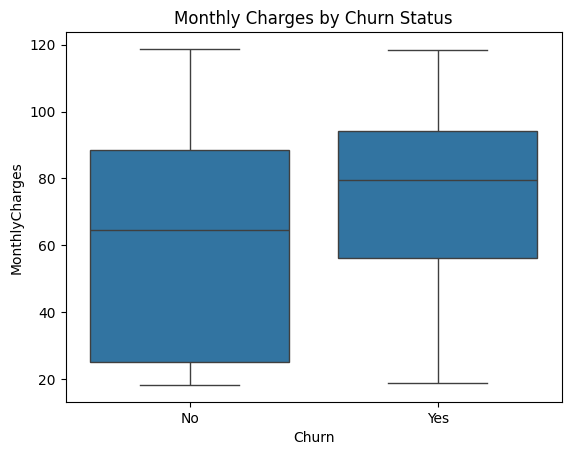

Churned: 
count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64


Retained: 
count    5163.000000
mean       61.307408
std        31.094557
min        18.250000
25%        25.100000
50%        64.450000
75%        88.475000
max       118.750000
Name: MonthlyCharges, dtype: float64


In [42]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.show()

print(f"Churned: \n{churned['MonthlyCharges'].describe()}")
print(f"\n")
print(f"Retained: \n{retained['MonthlyCharges'].describe()}")

**Insights from Monthly Charges:**
We compared Monthly Charges for customers who churned vs those who stayed.

**Key Findings:**

* `Churned` Customers pay `more` on average: ₹74.44

* `Retained` Customers pay `less` on average: ₹61.31

**What this means:**

* Customers paying `higher monthly charges` are more likely to `leave`.

* Many `loyal` customers are on `lower-priced` plans.

* Half of the churned customers pay more than ₹79.65/month, while half of the retained ones pay below ₹64.45/month.

There’s less variation in what churned customers pay compared to retained ones.

**Takeaway:**

* Higher charges may be linked to churn.
* Businesses should review premium plans, offer better value or support, and consider discounts to keep high-paying customers loyal.

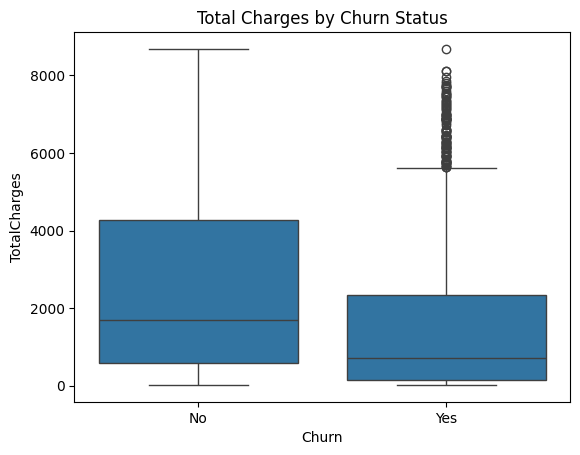

Churned: 
count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: TotalCharges, dtype: float64


Retained: 
count    5163.000000
mean     2555.344141
std      2329.456984
min        18.800000
25%       577.825000
50%      1683.600000
75%      4264.125000
max      8672.450000
Name: TotalCharges, dtype: float64


In [43]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges by Churn Status')
plt.show()

print(f"Churned: \n{churned['TotalCharges'].describe()}")
print(f"\n")
print(f"Retained: \n{retained['TotalCharges'].describe()}")

**Insights from Total Charges:** We compared Total Charges for customers who churned vs those who stayed.

**Key Findings:**

* `Churned` customers spent `less overall` (Avg: ₹1,531.80) than retained customers (Avg: ₹2,555.34).

* Half of the churned customers spent less than ₹703, while half of the retained ones spent more than ₹1,683.

* `Retained` customers also have `higher spending` in general.

**What This Means:**

* Customers who stay longer naturally spend more.

* Churned customers likely leave early, before adding much value.

**Takeaway:**

* To increase total revenue, businesses should
focus on keeping customers longer by improving early support and offering loyalty benefits.

#### **6. Do contract types affect churn?**

Let us see whether contract types affect the churning in customers.

The number of customers in each type contract can be  found by using `value_counts()`

In [44]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


* From this we can assume that, the customers opting for `Month-to-month` contract are `higher than` other two types `Two year` & `One year` contract types.

* To see the count of the churned & non-churned customers according to `contract type`, we can use `group by` function & then converting it into DataFrame so that it can used for plotting.

* Before that we can create the pivot table out of the grouping created using `unstack` function to view the groupings clearly.


In [45]:
contract_churn = df.groupby(['Churn','Contract'])['customerID'].count()
contract_churn_pivot = contract_churn.unstack(level='Churn')
contract_churn_pivot

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


Let us visualize the same using `barplot`.

Text(0.5, 1.0, 'Churned vs retained customers according to  Contract type')

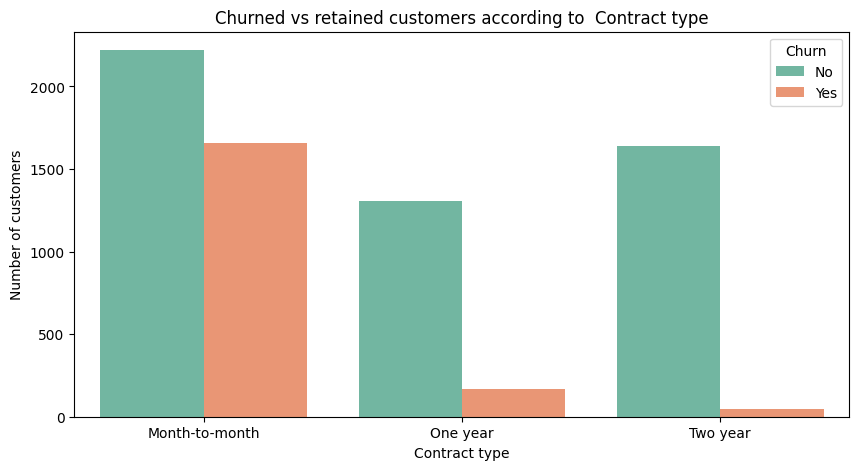

In [46]:
# Plot for analysing the churned vs retained customers according to Contract type
contract_churn = pd.DataFrame(contract_churn)

plt.figure(figsize=(10,5))
sns.barplot(data=contract_churn,x='Contract',y='customerID',hue='Churn',palette='Set2')
plt.xlabel('Contract type')
plt.ylabel('Number of customers')
plt.title('Churned vs retained customers according to  Contract type')

* From the above plot, we can see that the `number of customers churning are nearly equal to the retained customers in the month-to-month` contract.
* In other two contract types, the number of customers churning are very less compared to the retained customers.

#### **7. Does payment method influence churn?**

Let us see whether payment method affect the churning in customers.

The number of customers in each payment method can be found by using `value_counts()`

In [47]:
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


From this we can assume that, the customers opting for `Electronic check` Payment method are higher than other three types `Mailed check, Bank transfer(automatic) & Credit card(automatic)`.

To see the count of the churned & non-churned customers according to Payment method, we can use `group by` function & then converting it into DataFrame so that it can used for plotting.

Before that we can create the `pivot table` out of the grouping created using `unstack` function to view the groupings clearly.

In [48]:
payment_churn = df.groupby(['Churn','PaymentMethod'])['customerID'].count()
payment_churn_pivot = payment_churn.unstack(level='Churn')
payment_churn_pivot

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


From this we can understand that,

* `Electronic check` users have the `highest churn` (1071) — over 45% churn rate in this group.

* `Automatic payments via bank transfer and credit card` show `lower churn` (258 and 232 respectively), indicating better retention.

* `Mailed check` has `moderate churn` (308), slightly higher than automatic options but far lower than electronic checks.

Let us visualize the churned vs retained customers according to Payment method using `barplot`

Text(0.5, 1.0, 'Churned vs retained customers according to  Payment method')

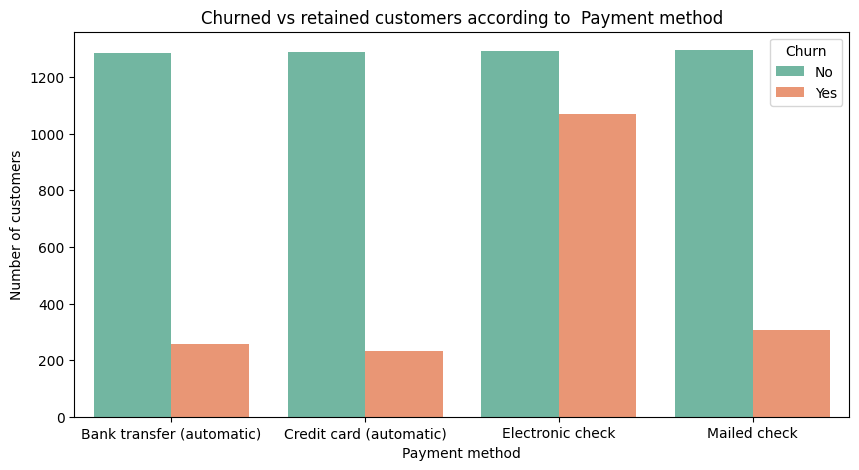

In [49]:
# Plot for analysing the churned vs retained customers according to Payment method
payment_churn = pd.DataFrame(payment_churn)

plt.figure(figsize=(10,5))
sns.barplot(data=payment_churn,x='PaymentMethod',y='customerID',hue='Churn',palette='Set2')
plt.xlabel('Payment method')
plt.ylabel('Number of customers')
plt.title('Churned vs retained customers according to  Payment method')

* From the above plot, we can see that the `number of customers churning are nearly equal to the retained customers in the Eloctronic check` payment method.
* In other payment methods, the number of customers churning are very less compared to the retained customers.

#### **8. Is churn associated with customer support interaction?**

Let us see whether any relation between customer support & churning in the customers

The number of customers who are given `tech support` & not can be found by using `value_counts()`

In [50]:
df['TechSupport'].value_counts()

,count
TechSupport,
No,3472
Yes,2040
No internet service,1520


From this we can get that, the number of customers `not getting TechSupport` are `very high` (assuming no internet service in No category only).

To see the count of the churned & non-churned customers according to `TechSupport` provision, we can use group by function & then converting it into DataFrame so that it can used for plotting.

Before that we can create the pivot table out of the grouping created using unstack function to view the groupings clearly.

In [51]:
tech_support_churn = df.groupby(['Churn','TechSupport'])['customerID'].count()
tech_support_churn_pivot = tech_support_churn.unstack(level='Churn')
tech_support_churn_pivot

Churn,No,Yes
TechSupport,,
No,2026,1446
No internet service,1407,113
Yes,1730,310


From this we can understand that,

* Customers `without tech support` have the `highest churn` (1446) — a clear red flag.

* Customers `with tech support` show `significantly lower churn` (310), indicating a positive impact on retention.

* `No internet service` group has `low churn`, but is a small segment.

Let us visualize the churned vs retained customers according to Tech support using `barplot`.

Text(0.5, 1.0, 'Churned vs retained customers according to Tech support')

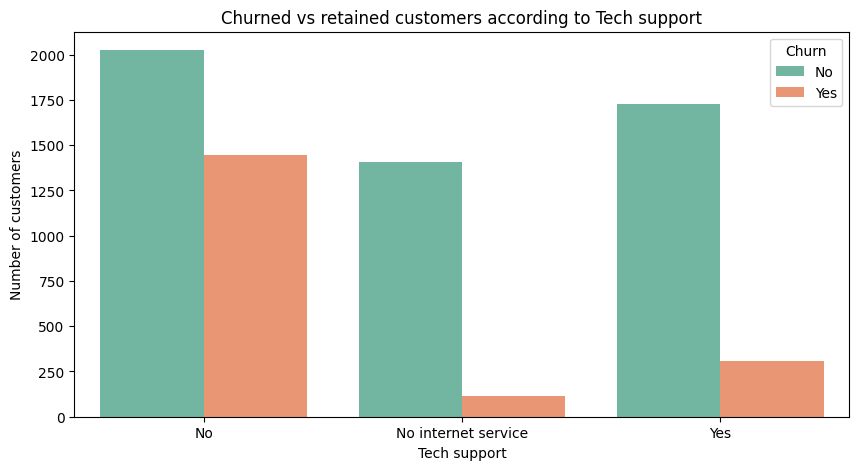

In [52]:
# Plot for analysing the churned vs retained customers according to Tech support
tech_support_churn = pd.DataFrame(tech_support_churn)

plt.figure(figsize=(10,5))
sns.barplot(data=tech_support_churn,x='TechSupport',y='customerID',hue='Churn',palette='Set2')
plt.xlabel('Tech support')
plt.ylabel('Number of customers')
plt.title('Churned vs retained customers according to Tech support')

* From the above plot, we can see that the `number of customers churning are very high when no tech support` is given.
* The number of customers churning are very less when tech support is given & also tech support is not given only for internet service.

#### **9. Is there any correlation between churn and add-on services?**

Let us now analyse whether any correlation between churn & add-on services.

Firstly, to see the varities of add-on services we can use `df.columns`.

In [53]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_Bin'],
      dtype='object')

So, the add-on services are

* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport

To get the separate data details of these add-on services along with churning details, `loc` function can be used.

In [54]:
add_on_services = df.loc[:,['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Churn']]
add_on_services.head(5)

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Churn
0,No,Yes,No,No,No
1,Yes,No,Yes,No,No
2,Yes,Yes,No,No,Yes
3,Yes,No,Yes,Yes,No
4,No,No,No,No,Yes


For better interpretation, let us assume `No internet service` as `No`.

In [55]:
# Let us assume 'no internet services' as 'no' for better interpretaion
add_on_services['DeviceProtection'] = add_on_services['DeviceProtection'].replace({'No internet service':'No'})
add_on_services['OnlineSecurity'] = add_on_services['OnlineSecurity'].replace({'No internet service':'No'})
add_on_services['OnlineBackup'] = add_on_services['OnlineBackup'].replace({'No internet service':'No'})
add_on_services['TechSupport'] = add_on_services['TechSupport'].replace({'No internet service':'No'})

Let us visualize the churn distribution by service usage using `crosstab` function & then plotting.

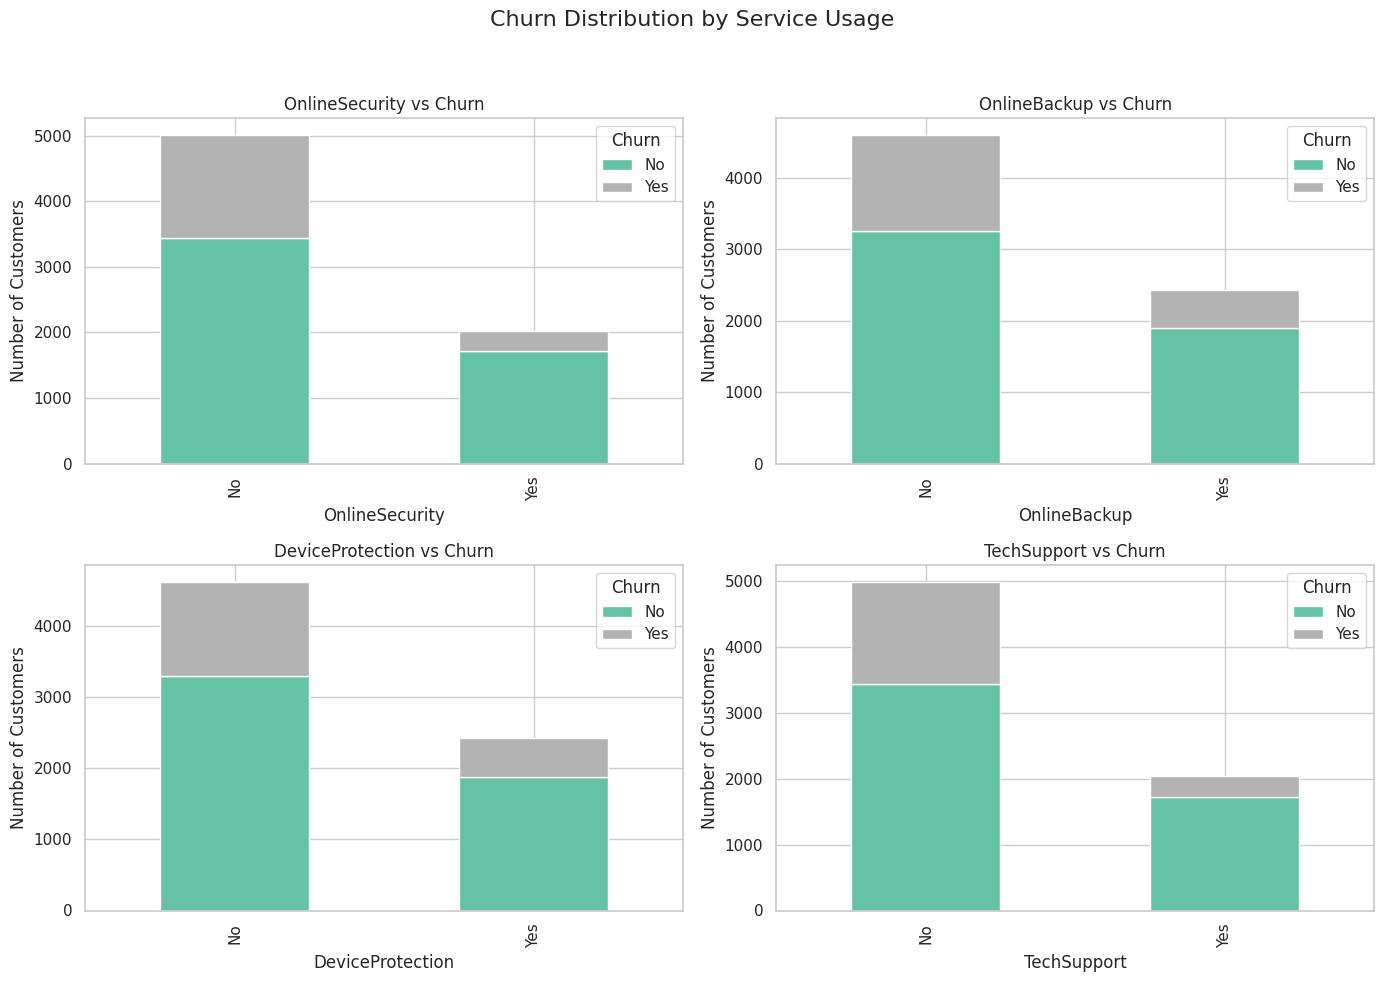

In [56]:
# Set the plot style
sns.set(style="whitegrid")

# Define the features to plot
features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Churn Distribution by Service Usage', fontsize=16)

# Plot each feature
for ax, feature in zip(axes.flat, features):
    crosstab = pd.crosstab(add_on_services[feature], add_on_services['Churn'])
    crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')
    ax.set_title(f'{feature} vs Churn')
    ax.set_xlabel(feature)
    ax.set_ylabel('Number of Customers')
    ax.legend(title='Churn', loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

From the above charts, it is clearly seen that the number of `churned customers are high when there is no tech support, no online security, no online back up & no device protection`.

Let us try finding Pearson's correlation.

To do so, we need all the features to be label encoded using `LabelEncoder`.

In [57]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Apply label encoding to each selected column
for col in add_on_services.columns:
    add_on_services[col] = le.fit_transform(df[col])

In [58]:
add_on_services.corr()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Churn
OnlineSecurity,1.000000,0.184942,0.175789,0.284875,-0.289050
OnlineBackup,0.184942,1.000000,0.187646,0.195581,-0.195290
DeviceProtection,0.175789,0.187646,1.000000,0.240476,-0.177883
TechSupport,0.284875,0.195581,0.240476,1.000000,-0.282232
Churn,-0.289050,-0.195290,-0.177883,-0.282232,1.000000


All the features show very little negative correlation.

Note:

Correlation methods like Pearson's (the usual .corr() in pandas) only work accurately with numeric and continuous variables. So directly using categorical variables in correlation can lead to misleading results unless they're properly encoded.

It can be misleading because
If we label encode categorical columns (e.g., 'Yes' = 1, 'No' = 0), correlation might:

* Imply order or magnitude where there is none (e.g., 'No internet service' ≠ halfway between 'Yes' and 'No')
* Misrepresent the true association

#### **10. What are the key differences in usage behavior between churned and non-churned customers?**

To find the key differences in usage behavior, we need to separate the features into `categorial & numercial features` separately.

In [59]:
# Define feature groups
cat_features = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'PhoneService', 'Contract', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

* Setup subplot grid by adjusting rows/columns depending on number of features.
* Plot categorical features as stacked bar charts.
* Plot numerical features as boxplots.
* Hide any remaining unused subplots

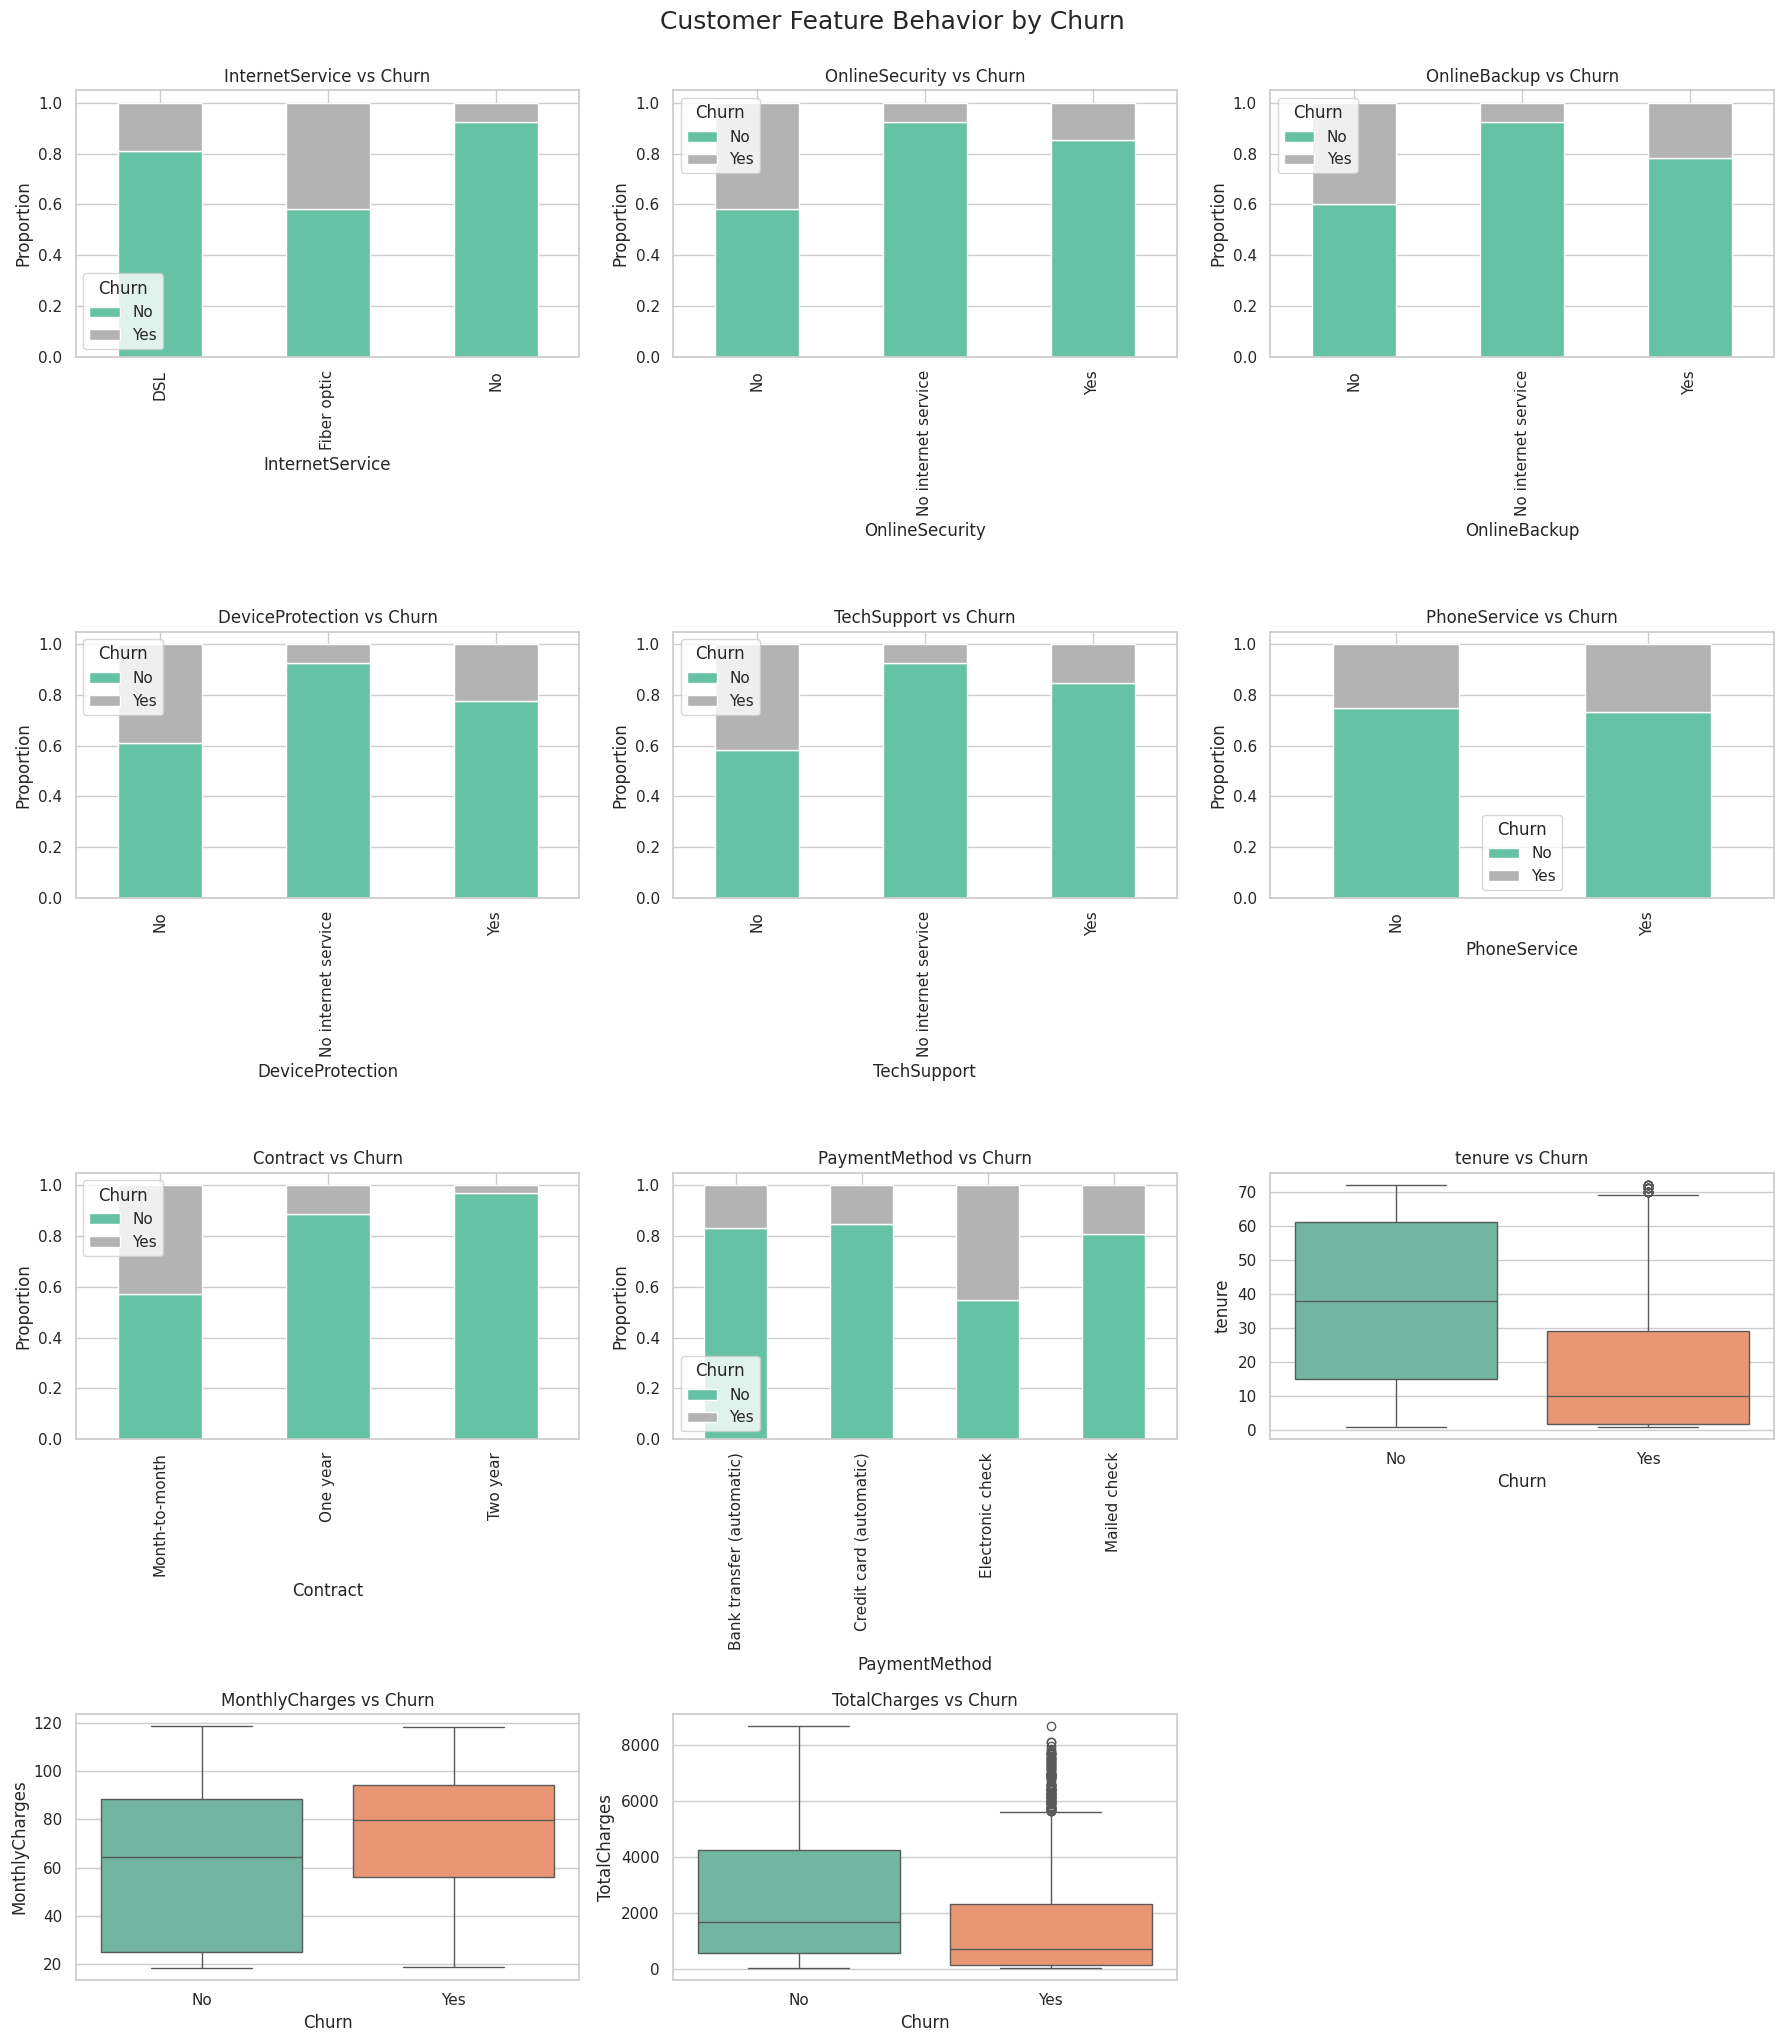

In [60]:
# Setup subplot grid: adjust rows/columns depending on number of features
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))
axes = axes.flatten()

# Plot categorical features as stacked bar charts
for i, col in enumerate(cat_features):
    ct = pd.crosstab(df[col], df['Churn'], normalize='index')
    ct.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2')
    axes[i].set_title(f"{col} vs Churn")
    axes[i].set_ylabel("Proportion")
    axes[i].legend(title="Churn")

# Plot numerical features as boxplots
for j, col in enumerate(num_features):
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[len(cat_features) + j], palette='Set2')
    axes[len(cat_features) + j].set_title(f"{col} vs Churn")

# Hide any remaining unused subplots
for k in range(len(cat_features) + len(num_features), len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.suptitle("Customer Feature Behavior by Churn", fontsize=18, y=1.02)
plt.show()


So from this, the behavior of all the features can be read easily in a single go.

#### **11.What are the top drivers of churn based on feature importance or correlation with churn?**

Let us now find the top drivers of churn based on correlation with churn & feature importance.

The categorical features can be encoded using `pd.get_dummies()` function so that it can be used find the correlation with churn.

In [61]:
# Encode the categorical values
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded.drop(columns=['customerID']), drop_first=True)
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_Bin_Established,tenure_Bin_Loyal,tenure_Bin_New
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,True,False,True,False,False,False,False,True
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,True,False,False,False,False,True,False,True,False,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,True,False,False,True,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,True,False,True,False,True,False,False,True


Let us now plot the correlation heatmap using `sns.heatmap` fucntion.

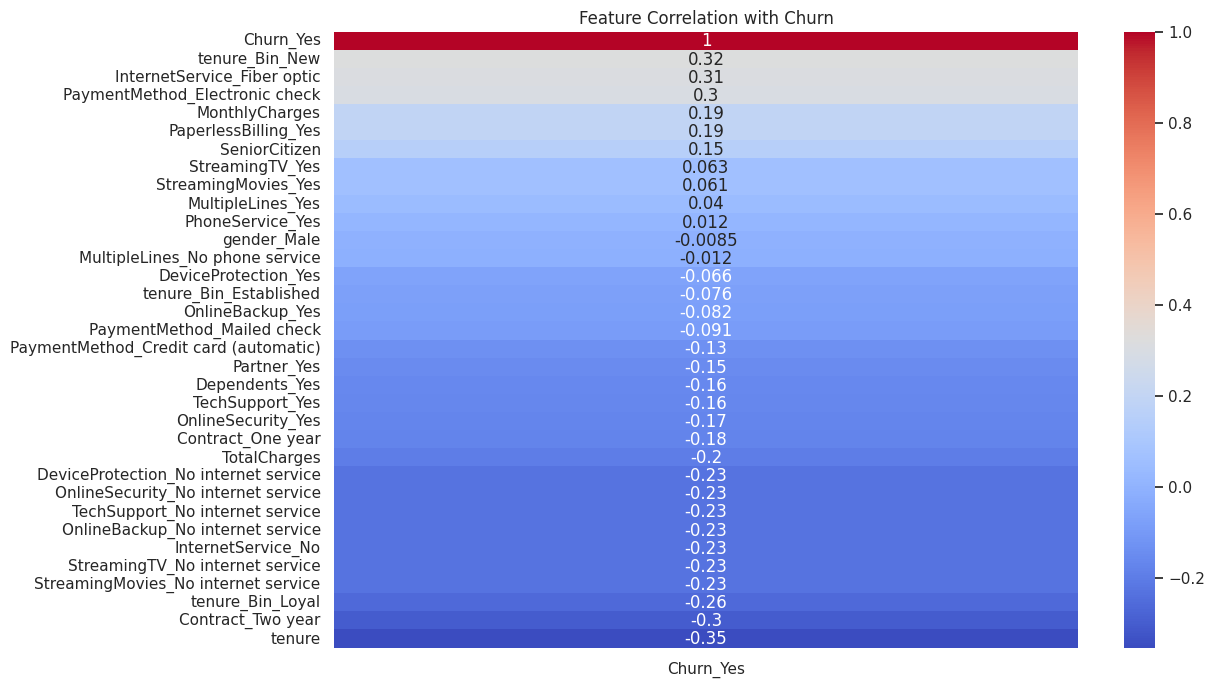

In [62]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df_encoded.corr()
sns.heatmap(corr[['Churn_Yes']].sort_values(by='Churn_Yes', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Churn')
plt.show()

* To find the feature importance, we are going to use Random forest algorithm.

* Assign values to dependent & independent features Y & X.

* Build the random forest classifier model.

* Fit the model to our features.

* Featute importance is found using model.feature_importances_
& creating pandas series of feature importance & index as independent features X.

* Then the top 15 features are found using `nlargest()` function.

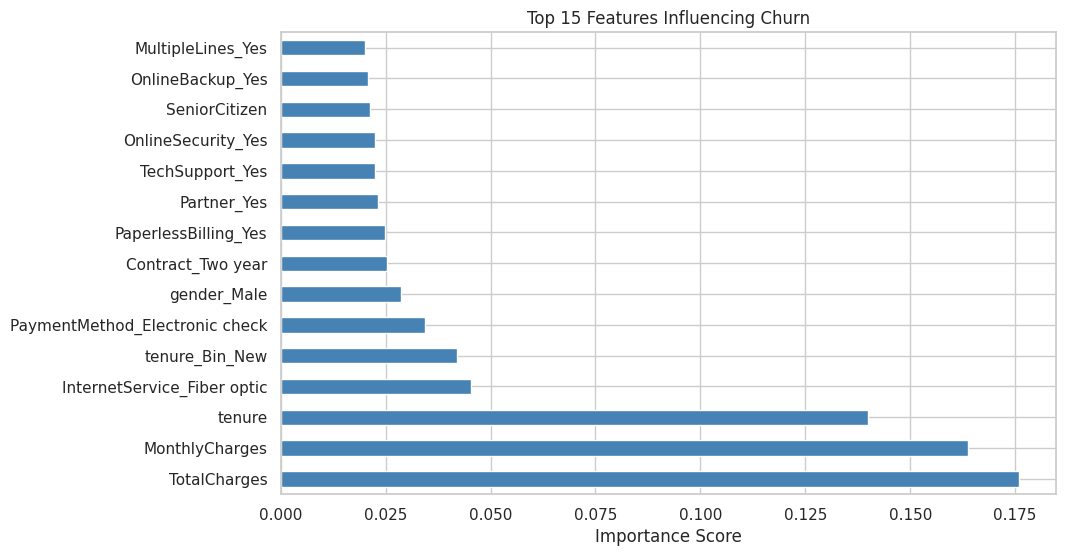

In [63]:
from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature importance
import pandas as pd
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(15).plot(kind='barh', figsize=(10, 6), color='steelblue')
plt.title('Top 15 Features Influencing Churn')
plt.xlabel('Importance Score')
plt.show()


**Top Insights from Feature Importance**
1. `tenure` is a strong `negative predictor` of churn

* Customers with longer tenure are less likely to churn.
* Suggests loyalty builds over time — retention efforts should focus on newer customers.



2. `TotalCharges` and `MonthlyCharges` are also important

* `High MonthlyCharges` could lead to `higher churn` if value isn't perceived.

* TotalCharges is correlated with tenure — low total but high monthly may signal recent, high-cost signups at risk.



3. `Internet Service` Type matters

* Features like InternetService_Fiber optic show higher importance.

* `Fiber users` may `churn more` — possibly due to high cost or competition in service quality.



4. `Contract Type` is a key factor

* Contract_Two year and Contract_One year have importance — long-term contracts reduce churn.

* `Month-to-month` customers are `more likely to leave` (though this wasn't in top 15, likely encoded elsewhere).



5. `Tech & Security Services` reduce Churn

* Features like `TechSupport_Yes` and `OnlineSecurity_Yes` help in `retaining customers`.

* These services could indicate higher engagement and satisfaction.



6. `Electronic Check` Payment Method `increases churn`

* PaymentMethod_Electronic check has notable importance — possibly a proxy for low digital engagement or less stable customers.



7. Bundled Services & Loyalty

* tenure_Bin_Loyal and tenure_Bin_New are influential — a strong signal that `new customers` are the `biggest churn` risk.

* Suggests value in segmenting churn strategies by customer lifecycle stage.



8. Paperless Billing & No Device Protection
`PaperlessBilling_Yes` and `DeviceProtection_No` internet service have low but non-negligible effects — could signal low engagement or service awareness.



**Strategic Recommendations:**

* Focus churn reduction on `new and monthly customers`.

* Promote value-added services like `Tech Support & Security early`.

* Review pricing structure for high-churn segments (e.g., `Fiber users`, `electronic check` users).

* Incentivize customers to move to long-term contracts.

* Bundle essential services to increase dependency & perceived value.



### **Telco Customer Churn Analysis Summary**


**1. Data Loading & Initial Exploration**
* **Dataset:** Loaded Telco Customer Churn dataset containing 7,043 entries and 21 columns.

* **Initial Checks:**

     * **Missing Values:** Identified and addressed missing or blank entries, particularly in the TotalCharges column.

     * **Data Types:** Noted that TotalCharges was read as an object; converted to numeric for accurate analysis.

**2. Data Preprocessing**

* **Handling Missing Values:** Removed entries with missing TotalCharges after conversion.

* **Data Type Corrections:** Ensured all columns have appropriate data types for analysis.

* **Duplicate Checks:** Verified and confirmed no duplicate entries present.

* **Outlier Detection:** Assessed numerical columns for outliers that could skew analysis.

**3. Exploratory Data Analysis (EDA)**

* **Univariate Analysis:**

 * **Tenure:** Average tenure is approximately 32 months; a significant number of customers have tenure less than 12 months.

 * **MonthlyCharges:** Charges range from $18.25 to $118.75, with an average around $64.76.

 * **TotalCharges:** Total charges vary widely, indicating diverse customer billing histories.

**Bivariate Analysis:**

* **Churn vs. Contract Type:** Higher churn observed among month-to-month contracts compared to one or two-year contracts.

* **Churn vs. Payment Method:** Customers using electronic checks show higher churn rates than those using automatic payments.

* **Churn vs. Tech Support:** Lack of tech support correlates with higher churn.

**Multivariate Analysis:**

* **Churn vs. Multiple Factors:** Customers with short tenure, high monthly charges, and no tech support are more likely to churn.

**4. Key Insights**

* **Early Tenure Churn:** Customers are more likely to churn within the first year of service.

* **Service Features Impact:** Absence of services like tech support and online security is associated with higher churn.

* **Payment Methods:** Automatic payment methods are linked to lower churn rates.

**5. Recommendations**

* **Enhance Onboarding:** Focus on the initial months to improve customer experience and reduce early churn.

* **Promote Service Bundles:** Encourage adoption of additional services like tech support to increase customer retention.

* **Incentivize Automatic Payments:** Offer benefits for customers who opt for automatic payment methods to lower churn.